In [ ]:
# 구글 드라이브와 연결하기 
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [ ]:
btc.to_csv( "/content/drive/MyDrive/Colab Notebooks/btc1.csv", index=False, encoding='utf-8-sig')

### 1. 캔들스틱 차트 그리기

In [ ]:
!pip install pandas-datareader # 주식 데이터 조회
!pip install plotly # 차트 라이브러리

In [ ]:
!pip install mplfinance
import mplfinance as mpf

     |████████████████████████████████| 70 kB 3.0 MB/s 


In [ ]:
# # 실시간 루나(LUNA)의 가격을 가져옵니다 
# # 이건 왜 에러가 뜨는지 잘 모르겠음? 

# import requests
# import pandas as pd

# def get_crypto_price(symbol, exchange, start_date = None):
#     api_key = 'YOUR API KEY'
#     api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={api_key}'
#     raw_df = requests.get(api_url).json()
#     df = pd.DataFrame(raw_df['Time Series (Digital Currency Daily)']).T
#     df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'close', '5. volume': 'volume'})
#     for i in df.columns:
#         df[i] = df[i].astype(float)
#     df.index = pd.to_datetime(df.index)
#     df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
#     if start_date:
#         df = df[df.index >= start_date]
#     return df

# ETH = get_crypto_price(symbol = 'LUNA', exchange = 'USD', start_date = '2021-11-01')
# ETH

KeyboardInterrupt: ignored

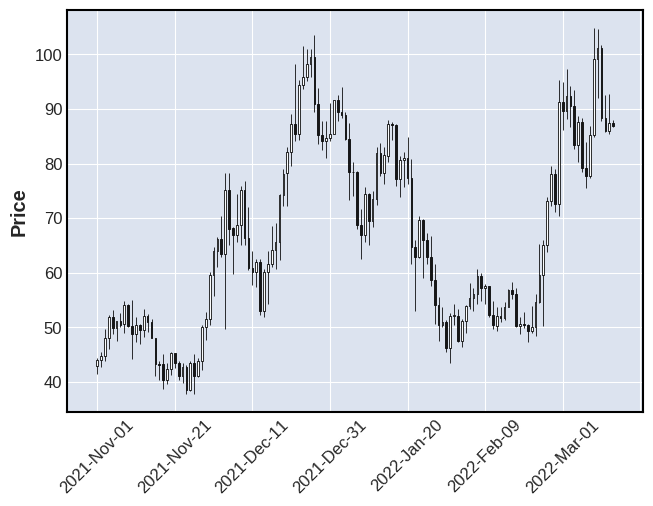

In [ ]:
# # 루나의 가격을 그래프 
# mpf.plot(ETH, type='candle')

# 1번 (올해 데이터로 시작하기) 

In [ ]:
# 실시간 비트코인 가격을 가져옵니다 (일봉 기준)

# 사실상 여기서부터 시작 

import requests
import pandas as pd

def get_crypto_price(symbol, exchange, start_date = None):
    api_key = 'YOUR API KEY'
    api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={api_key}'
    raw_df = requests.get(api_url).json()
    df = pd.DataFrame(raw_df['Time Series (Digital Currency Daily)']).T
    df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'close', '5. volume': 'volume'})
    for i in df.columns:
        df[i] = df[i].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
    if start_date:
        df = df[df.index >= start_date]
    return df

btc = get_crypto_price(symbol = 'BTC', exchange = 'USD', start_date = '2021-11-01')
btc

# 이 데이터를 CSV로 만든 다음에 캔들스틱으로 변환하고 그 후에 아래의 절차를 따른다? 

,open,high,low,close,volume
2021-11-01,61299.81,62437.74,59405.00,60911.11,44687.66672
2021-11-02,60911.12,64270.00,60624.68,63219.99,46368.28410
2021-11-03,63220.57,63500.00,60382.76,62896.48,43336.09049
2021-11-04,62896.49,63086.31,60677.01,61395.01,35930.93314
2021-11-05,61395.01,62595.72,60721.00,60937.12,31604.48749
...,...,...,...,...,...
2022-03-16,39280.33,41718.00,38828.48,41114.00,88120.76167
2022-03-17,41114.01,41478.82,40500.00,40917.90,37189.38087
2022-03-18,40917.89,42325.02,40135.04,41757.51,45408.00969
2022-03-19,41757.51,42400.00,41499.29,42201.13,29067.18108


In [ ]:
# 날짜 -> 인덱스로 빼기
 
btc = btc.reset_index()
btc

,index,open,high,low,close,volume
0,2021-11-01,61299.81,62437.74,59405.00,60911.11,44687.66672
1,2021-11-02,60911.12,64270.00,60624.68,63219.99,46368.28410
2,2021-11-03,63220.57,63500.00,60382.76,62896.48,43336.09049
3,2021-11-04,62896.49,63086.31,60677.01,61395.01,35930.93314
4,2021-11-05,61395.01,62595.72,60721.00,60937.12,31604.48749
...,...,...,...,...,...,...
133,2022-03-14,37777.35,39947.12,37555.00,39671.37,46945.45375
134,2022-03-15,39671.37,39887.61,38098.33,39280.33,46015.54926
135,2022-03-16,39280.33,41718.00,38828.48,41114.00,88120.76167
136,2022-03-17,41114.01,41478.82,40500.00,40917.90,37189.38087


Text(0.5, 1.0, 'test0')

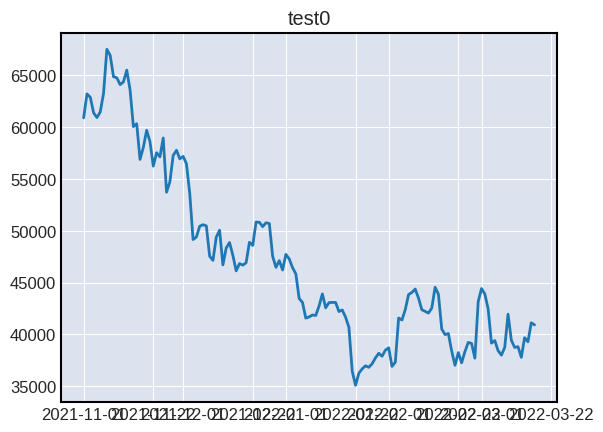

In [ ]:
# 비트코인 가격은 Staionary 한가? 확인 

import matplotlib.pyplot as plt
plt.plot(btc['index'], btc['close'])
plt.title('test0')


# 2번 (테슬라 매입 발표 이후) 

In [38]:
# 실시간 비트코인 가격을 가져옵니다 
# 2021년 1월 부터의 데이터로 시작 

import requests
import pandas as pd

def get_crypto_price(symbol, exchange, start_date = None):
    api_key = 'YOUR API KEY'
    api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={api_key}'
    raw_df = requests.get(api_url).json()
    df = pd.DataFrame(raw_df['Time Series (Digital Currency Daily)']).T
    df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'close', '5. volume': 'volume'})
    for i in df.columns:
        df[i] = df[i].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
    if start_date:
        df = df[df.index >= start_date]
    return df

btc_0 = get_crypto_price(symbol = 'BTC', exchange = 'USD', start_date = '2021-01-31')
btc_0

# 이 데이터를 CSV로 만든 다음에 캔들스틱으로 변환하고 그 후에 아래의 절차를 따른다? 

,open,high,low,close,volume
2021-01-31,34262.89,34342.69,32171.67,33092.98,68742.280384
2021-02-01,33092.97,34717.27,32296.16,33526.37,82718.276882
2021-02-02,33517.09,35984.33,33418.00,35466.24,78056.659880
2021-02-03,35472.71,37662.63,35362.38,37618.87,80784.333663
2021-02-04,37620.26,38708.27,36161.95,36936.66,92080.735898
...,...,...,...,...,...
2022-03-18,40917.89,42325.02,40135.04,41757.51,45408.009690
2022-03-19,41757.51,42400.00,41499.29,42201.13,29067.181080
2022-03-20,42201.13,42296.26,40911.00,41262.11,30653.334680
2022-03-21,41262.11,41544.22,40467.94,41002.25,39426.248770


In [39]:
# Stationary Data 로 만들기 
# 날짜를 index 로 뺌 

btc_1 = btc_0.diff()
btc_1= btc_1.dropna()
btc_1 = btc_1.reset_index()
btc_1

,index,open,high,low,close,volume
0,2021-02-01,-1169.92,374.58,124.49,433.39,13975.996498
1,2021-02-02,424.12,1267.06,1121.84,1939.87,-4661.617002
2,2021-02-03,1955.62,1678.30,1944.38,2152.63,2727.673783
3,2021-02-04,2147.55,1045.64,799.57,-682.21,11296.402235
4,2021-02-05,-683.61,-398.15,408.05,1353.58,-25399.401623
...,...,...,...,...,...,...
410,2022-03-18,-196.12,846.20,-364.96,839.61,8218.628820
411,2022-03-19,839.62,74.98,1364.25,443.62,-16340.828610
412,2022-03-20,443.62,-103.74,-588.29,-939.02,1586.153600
413,2022-03-21,-939.02,-752.04,-443.06,-259.86,8772.914090


In [3]:
# Stationary Data #2 
# 날짜는 그대로 유지 

btc_2= btc_0.diff()
btc_2= btc_2.dropna()
btc_2

,open,high,low,close,volume
2021-02-01,-1169.92,374.58,124.49,433.39,13975.996498
2021-02-02,424.12,1267.06,1121.84,1939.87,-4661.617002
2021-02-03,1955.62,1678.30,1944.38,2152.63,2727.673783
2021-02-04,2147.55,1045.64,799.57,-682.21,11296.402235
2021-02-05,-683.61,-398.15,408.05,1353.58,-25399.401623
...,...,...,...,...,...
2022-03-18,-196.12,846.20,-364.96,839.61,8218.628820
2022-03-19,839.62,74.98,1364.25,443.62,-16340.828610
2022-03-20,443.62,-103.74,-588.29,-939.02,1586.153600
2022-03-21,-939.02,-752.04,-443.06,-259.86,8772.914090


In [ ]:
# 무작위로 훈련/테스트 데이터셋으로 나누기 

from sklearn.model_selection import train_test_split 
train, test = train_test_split(btc_2, train_size = 0.80,
                               shuffle=True, random_state=121)

In [ ]:
# Train 과 Test 데이터로 나누기 

features = ['open', 'high', 'low', 'volume']
target = ['close']

X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

X_train.shape, X_test.shape

((328, 4), (82, 4))

In [ ]:
X_train.shape[1]

4

In [ ]:
X_train.shape

(328, 4)

# 실험용 모델 # 0 

In [ ]:
# 좀 해보다가 말았음 ... 

#import keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense, LSTM, Dropout

In [ ]:
#this helper function assembles the LSTM model
def lstm_model(N_neurons, input_shape, output_size, activ_func='linear', dropout=0.25, loss='mae', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(N_neurons, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [ ]:
X_train.shape

In [ ]:
# train LSTM model...1 minute on macbook pro
# LSTM Crypto Model 참고 

N_neurons = 12
input_shape = X_train[0].shape
output_size = 1
N_epochs = 21
np.random.seed(124)
model = lstm_model(N_neurons, input_shape, output_size, activ_func='tanh', dropout=0.35)
loss_history = model.fit(X_train, Y_train, epochs=N_epochs, batch_size=1, validation_data=(X_test, Y_test),
    verbose=0, shuffle=True)
print (' training  loss = ', loss_history.history['loss'][-1])
print ('validation loss = ', loss_history.history['val_loss'][-1])

# Model # 1 
Stationary Data -> 일반적인 LSTM 모델링 진행 

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['open', 'high', 'low', 'close']
# 스케일 후 columns
scaled = scaler.fit_transform(btc_1[scale_cols])

btc_1 = pd.DataFrame(scaled, columns=scale_cols)
print(btc_1)

         open      high       low     close
0    0.405311  0.510473  0.643761  0.511161
1    0.513660  0.575488  0.695646  0.614218
2    0.617759  0.605446  0.738437  0.628773
3    0.630804  0.559358  0.678880  0.434843
4    0.438366  0.454181  0.658512  0.574111
..        ...       ...       ...       ...
410  0.471502  0.544829  0.618298  0.538950
411  0.541902  0.488648  0.708257  0.511861
412  0.514986  0.475628  0.606680  0.417275
413  0.421006  0.428401  0.614235  0.463736
414  0.467170  0.446083  0.658487  0.479145

[415 rows x 4 columns]


In [42]:
# 1 Stationary 

X_train, X_test, Y_train, Y_test = train_test_split(btc_1.drop('close', 1), btc_1['close'], test_size=0.1, random_state=0, shuffle=False)
X_train.shape, Y_train.shape
print(type(X_test))
print(X_test)

<class 'pandas.core.frame.DataFrame'>
         open      high       low
373  0.498631  0.432702  0.660795
374  0.507243  0.557636  0.640202
375  0.425203  0.344702  0.573010
376  0.408588  0.421956  0.624298
377  0.474238  0.459912  0.646707
378  0.473670  0.489188  0.620666
379  0.517614  0.622252  0.682881
380  0.621381  0.468512  0.683063
381  0.439204  0.455120  0.469052
382  0.256594  0.249721  0.604863
383  0.448042  0.445628  0.647118
384  0.491950  0.459956  0.552017
385  0.369805  0.437212  0.574857
386  0.391118  0.405577  0.613874
387  0.567905  0.542989  0.673013
388  0.418199  0.526389  0.496067
389  0.558150  0.471569  0.829358
390  0.545359  0.531624  0.666355
391  0.477870  0.447290  0.555443
392  0.388472  0.801540  0.660704
393  0.856019  0.535866  0.916118
394  0.570558  0.516040  0.664550
395  0.448929  0.388565  0.559155
396  0.387022  0.368536  0.466530
397  0.260162  0.270903  0.629876
398  0.501779  0.489059  0.620688
399  0.418412  0.472528  0.588717
400  0.455

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
# # index랑 volume 드랍하고 column 네 개만 남기기 

# btc_1_ = btc_1_.drop('index', axis=1)
# btc_1_ = btc_1_.drop('volume', axis=1)
# btc_1_

In [44]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [45]:
WINDOW_SIZE=5
BATCH_SIZE=32

In [46]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(X_train, Y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(X_test, Y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [47]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=3,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 3]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [48]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)
                             
history0 = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
     10/Unknown - 2s 6ms/step - loss: 0.1444 - mse: 0.2887
Epoch 1: val_loss improved from inf to 0.11876, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 3s 60ms/step - loss: 0.1413 - mse: 0.2826 - val_loss: 0.1188 - val_mse: 0.2375
Epoch 2/100
11/12 [==========================>...] - ETA: 0s - loss: 0.1047 - mse: 0.2095
Epoch 2: val_loss improved from 0.11876 to 0.07544, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 0s 10ms/step - loss: 0.1033 - mse: 0.2066 - val_loss: 0.0754 - val_mse: 0.1509
Epoch 3/100
11/12 [==========================>...] - ETA: 0s - loss: 0.0619 - mse: 0.1237
Epoch 3: val_loss improved from 0.07544 to 0.03825, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 0s 10ms/step - loss: 0.0609 - mse: 0.1219 - val_loss: 0.0383 - val_mse: 0.0765
Epoch 4/100
10/12 [========================>.....] - ETA: 0s - loss: 0.0287 - mse: 0.0575
Epoch 4: val_loss improved from 0

In [51]:
model.evaluate(test_data, verbose=1)

2/2 [==============================] - 0s 35ms/step - loss: 0.0067 - mse: 0.0134


[0.006689791567623615, 0.01337958313524723]

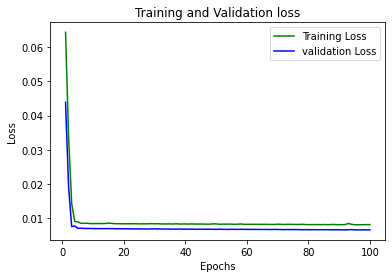

In [ ]:
# 딥러닝 평가지표 

loss_train = history0.history['loss']
loss_val = history0.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print("%.7f" % (float(min(history.history['val_loss']))))
model.load_weights(filename)
pred = model.predict(test_data)
actual = np.asarray(Y_test)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))
print(pred.shape)
print(actual.shape)

0.0065617
(37, 1)
(37, 1)


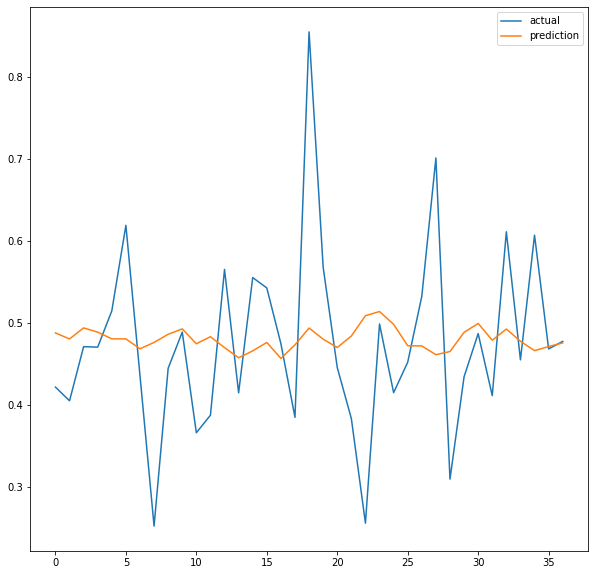

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

# Model #2
0 / 1 바이너리 -> 이진분류 모델링  

In [ ]:
btc_2

,open,high,low,close,volume
2021-02-01,-1169.92,374.58,124.49,1.0,13975.996498
2021-02-02,424.12,1267.06,1121.84,1.0,-4661.617002
2021-02-03,1955.62,1678.30,1944.38,1.0,2727.673783
2021-02-04,2147.55,1045.64,799.57,0.0,11296.402235
2021-02-05,-683.61,-398.15,408.05,1.0,-25399.401623
...,...,...,...,...,...
2022-03-16,-391.04,1830.39,730.15,1.0,42105.212410
2022-03-17,1833.68,-239.18,1671.52,0.0,-50931.380800
2022-03-18,-196.12,846.20,-364.96,1.0,8218.628820
2022-03-19,839.62,74.98,1364.25,1.0,-16340.828610


In [9]:
# 일봉 종가가 상승하는 경우는 1로 레이블 
# 일봉 종가가 하락하는 경우는 0으로 레이블 

btc_2['close'].loc[btc_2['close'] >= 0] = 1
btc_2['close'].loc[btc_2['close'] <= 0] = 0
btc_2

,open,high,low,close,volume
2021-02-01,-1169.92,374.58,124.49,1.0,13975.996498
2021-02-02,424.12,1267.06,1121.84,1.0,-4661.617002
2021-02-03,1955.62,1678.30,1944.38,1.0,2727.673783
2021-02-04,2147.55,1045.64,799.57,0.0,11296.402235
2021-02-05,-683.61,-398.15,408.05,1.0,-25399.401623
...,...,...,...,...,...
2022-03-18,-196.12,846.20,-364.96,1.0,8218.628820
2022-03-19,839.62,74.98,1364.25,1.0,-16340.828610
2022-03-20,443.62,-103.74,-588.29,0.0,1586.153600
2022-03-21,-939.02,-752.04,-443.06,0.0,8772.914090


In [ ]:
btc_2

In [10]:
from keras import models
from keras import layers

#// Keras에서 모델을 빌드하는 방법은 Sequential()과 함수형 API 두 방법이 있다.
model3 = models.Sequential() 
model3.add(layers.Dense(16, activation='relu', input_shape(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

SyntaxError: ignored

In [16]:
# 1 Stationary 
from sklearn.model_selection import train_test_split 
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(btc_2.drop('close', 1), btc_2['close'], test_size=0.1, random_state=0, shuffle=False)
X_train3.shape, Y_train3.shape
print(type(X_test3))
print(X_test3)

<class 'pandas.core.frame.DataFrame'>
               open     high      low       volume
2022-02-09   203.01  -693.00   451.92 -30452.12658
2022-02-10   329.71  1022.00    56.09  27929.12362
2022-02-11  -877.27 -1901.00 -1235.50 -17382.12221
2022-02-12 -1121.71  -840.51  -249.63 -18418.31189
2022-02-13  -155.86  -319.49   181.12  -8824.77568
2022-02-14  -164.22    82.40  -319.44  16278.04947
2022-02-15   482.29  1909.00   876.47   4085.06516
2022-02-16  2008.91  -201.43   879.97  -9623.32306
2022-02-17  -671.29  -385.26 -3233.79  18774.12224
2022-02-18 -3357.85 -3204.83  -623.21  -3400.07253
2022-02-19  -541.26  -515.56   189.03 -25803.86731
2022-02-20   104.72  -318.88 -1639.03  15397.23501
2022-02-21 -1692.28  -631.09 -1200.00  28908.39485
2022-02-22 -1378.73 -1065.35  -450.00  -8561.73907
2022-02-23  1222.17   820.93   686.79 -10225.21389
2022-02-24  -980.31   593.07 -2714.51  76915.56258
2022-02-25  1078.66  -159.47  3692.09 -63901.72333
2022-02-26   890.48   664.92   558.81 -27213

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
WINDOW_SIZE=5
BATCH_SIZE=32

In [12]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [17]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data3 = windowed_dataset(X_train3, Y_train3, WINDOW_SIZE, BATCH_SIZE, True)
test_data3 = windowed_dataset(X_test3, Y_test3, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
model3 = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=4,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 4]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model3.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)
                             
history = model3.fit(train_data3, 
                    validation_data=(test_data3), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
      7/Unknown - 0s 9ms/step - loss: 0.1248 - mse: 0.2495 
Epoch 1: val_loss improved from inf to 0.13275, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 0s 21ms/step - loss: 0.1303 - mse: 0.2605 - val_loss: 0.1327 - val_mse: 0.2655
Epoch 2/100
 9/12 [=====================>........] - ETA: 0s - loss: 0.1292 - mse: 0.2584
Epoch 2: val_loss did not improve from 0.13275
12/12 [==============================] - 0s 10ms/step - loss: 0.1289 - mse: 0.2578 - val_loss: 0.1388 - val_mse: 0.2775
Epoch 3/100
11/12 [==========================>...] - ETA: 0s - loss: 0.1276 - mse: 0.2552
Epoch 3: val_loss did not improve from 0.13275
12/12 [==============================] - 0s 9ms/step - loss: 0.1290 - mse: 0.2580 - val_loss: 0.1419 - val_mse: 0.2839
Epoch 4/100
 9/12 [=====================>........] - ETA: 0s - loss: 0.1292 - mse: 0.2584
Epoch 4: val_loss did not improve from 0.13275
12/12 [==============================] - 0s 10ms/step - loss: 0.1292 - m

In [ ]:
print("%.7f" % (float(min(history.history['val_loss']))))
model3.load_weights(filename)
pred0 = model3.predict(test_data3)
actual0 = np.asarray(Y_test3)[WINDOW_SIZE:]
actual0 = np.reshape(actual0, (len(actual0), 1))
print(pred0.shape)
print(actual0.shape)

0.1327479
(37, 1)
(37, 1)


In [ ]:
pred0

array([[0.711394  ],
       [0.15249208],
       [0.19043848],
       [0.45528254],
       [0.00570159],
       [0.2778688 ],
       [0.68396866],
       [0.9935881 ],
       [0.42278013],
       [0.6482921 ],
       [0.6554914 ],
       [0.36053503],
       [0.28124994],
       [0.01781154],
       [0.60044694],
       [0.3588112 ],
       [0.3208241 ],
       [0.43922907],
       [0.5163677 ],
       [0.41699043],
       [0.32940233],
       [0.7704043 ],
       [0.49461097],
       [0.11755445],
       [0.611439  ],
       [0.51658076],
       [0.56615084],
       [0.5894922 ],
       [0.4604048 ],
       [0.3588112 ],
       [0.35289654],
       [0.38332227],
       [0.18239605],
       [0.14601591],
       [0.69959784],
       [0.35723805],
       [0.33334014]], dtype=float32)

In [ ]:
pred2 = np.where(pred0>=0.5,1,0)
pred2

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
actual0

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

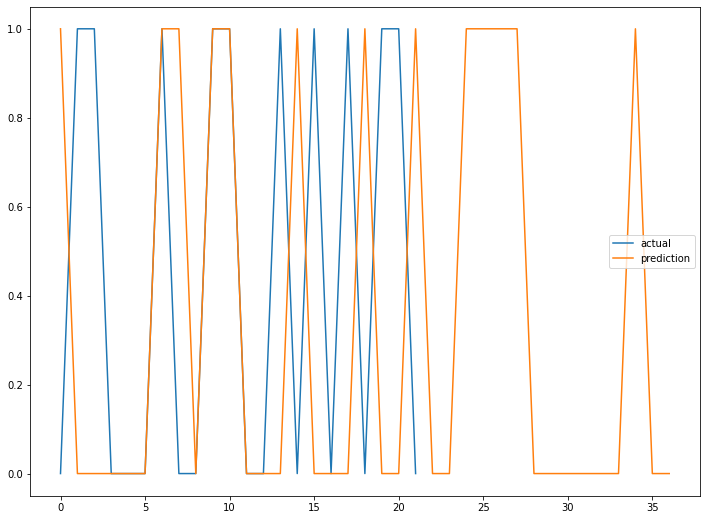

In [ ]:
# Pred #2 
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(Y_test3)[20:], label='actual')
plt.plot(pred2, label='prediction')
plt.legend()
plt.show()

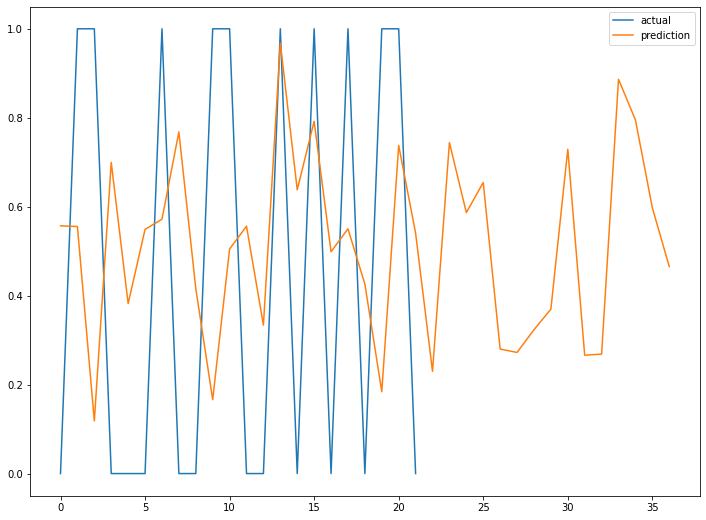

In [ ]:
# Pred #1 
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(Y_test3)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

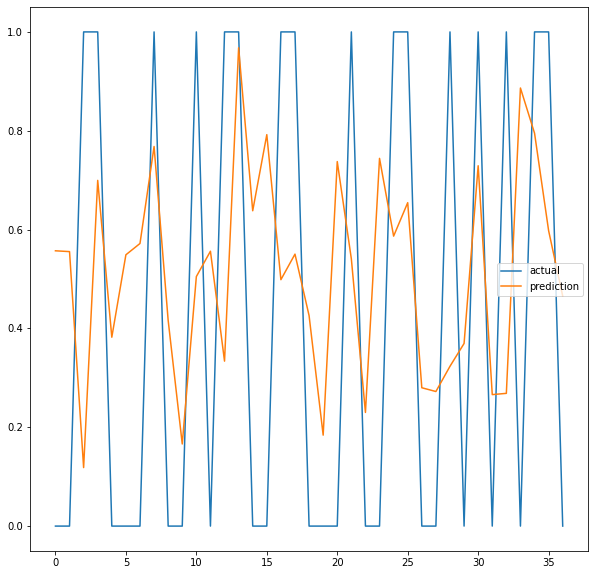

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

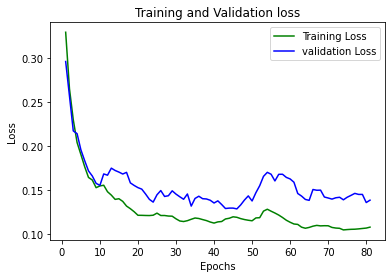

In [ ]:
# 딥러닝 평가지표 

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,82)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Loss Function을 이진분류로 바꿈 

In [13]:
model4 = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=4,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 4]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mse'])

In [28]:
import keras

In [29]:
# 파라미터 저장 경로를 설정하는 코드입니다.
checkpoint_filepath = "FMbest.hdf5"

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

In [30]:
save_best = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None)

In [50]:
model.evaluate(test_data3, verbose=1)

ValueError: ignored

In [35]:
model4.evaluate(test_data3, verbose=1)

2/2 [==============================] - 0s 35ms/step - loss: 0.7913 - mse: 0.2917


[0.7912996411323547, 0.291693776845932]

In [31]:
model4.fit(X_train3, Y_train3, batch_size=32, epochs=30, verbose=1, 
          validation_data=(X_test3, Y_test3), 
          callbacks=[early_stop, save_best])

Epoch 1/30


ValueError: ignored

In [18]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)
                             
history = model4.fit(train_data3, 
                    validation_data=(test_data3), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
      1/Unknown - 3s 3s/step - loss: 10.2159 - mse: 1.4653
Epoch 1: val_loss improved from inf to 6.03666, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 4s 66ms/step - loss: 7.2797 - mse: 0.9689 - val_loss: 6.0367 - val_mse: 0.7432
Epoch 2/100
 1/12 [=>............................] - ETA: 0s - loss: 6.4057 - mse: 0.7824
Epoch 2: val_loss improved from 6.03666 to 6.00300, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 0s 9ms/step - loss: 7.2201 - mse: 0.9560 - val_loss: 6.0030 - val_mse: 0.7246
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 7.1821 - mse: 0.9276
Epoch 3: val_loss improved from 6.00300 to 5.98994, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 0s 11ms/step - loss: 7.1821 - mse: 0.9276 - val_loss: 5.9899 - val_mse: 0.6808
Epoch 4/100
11/12 [==========================>...] - ETA: 0s - loss: 7.0876 - mse: 0.8923
Epoch 4: val_loss did not improve 

In [19]:
print("%.7f" % (float(min(history.history['val_loss']))))
model4.load_weights(filename)
pred = model4.predict(test_data3)
actual = np.asarray(Y_test3)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))
print(pred.shape)
print(actual.shape)

0.7912996
(37, 1)
(37, 1)


In [20]:
pred

array([[ 0.1435222 ],
       [ 0.42874464],
       [ 0.12173301],
       [ 0.6750107 ],
       [ 0.52105176],
       [ 0.30533126],
       [ 0.16518873],
       [ 0.06266508],
       [ 0.39945364],
       [ 0.29485375],
       [ 0.09687092],
       [ 0.62152505],
       [ 0.15483543],
       [ 0.2918811 ],
       [ 0.55440485],
       [ 0.181409  ],
       [ 0.374896  ],
       [ 0.13894194],
       [ 0.5176033 ],
       [ 0.26989508],
       [ 0.27310652],
       [ 0.33543092],
       [ 0.40010953],
       [ 0.38446835],
       [ 0.39878774],
       [ 0.43745765],
       [ 0.18053603],
       [ 0.13863076],
       [ 0.34192252],
       [ 0.12227029],
       [ 0.26313853],
       [ 0.69000864],
       [ 0.23589015],
       [ 0.31573084],
       [ 0.61724377],
       [-0.07677987],
       [ 0.5088043 ]], dtype=float32)

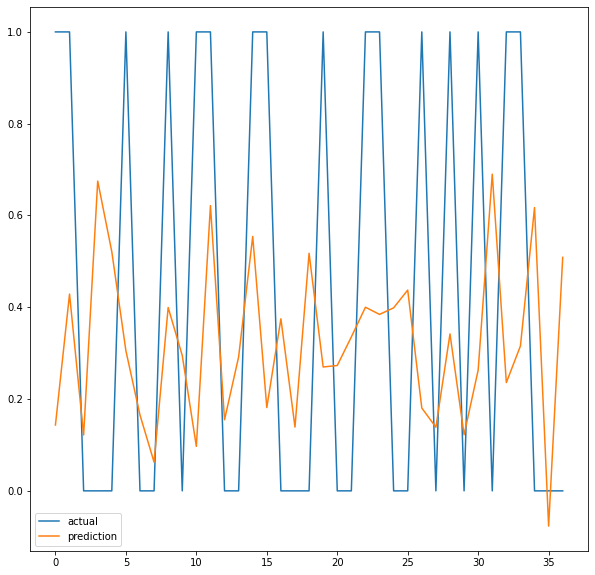

In [25]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

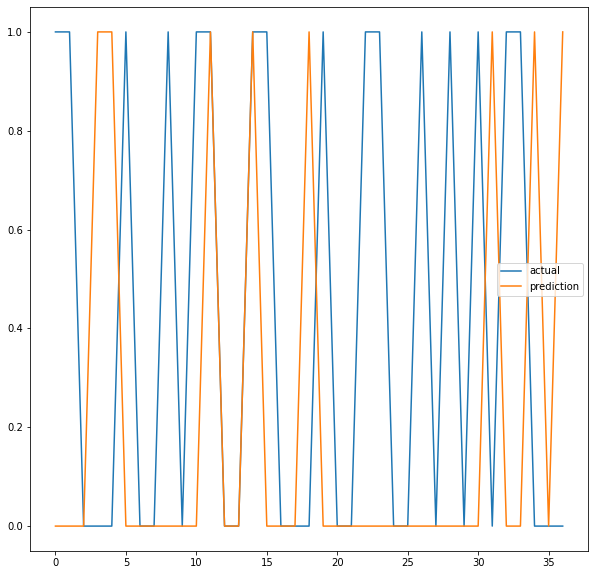

In [26]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred2, label='prediction')
plt.legend()
plt.show()

In [ ]:
pred2 = np.where(pred>=0.5,1,0)
pred2

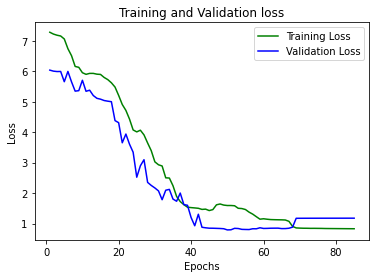

In [23]:
# 딥러닝 평가지표 
# Trainig and Validation Loss 

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,86)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_data3

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 4), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
test_data3

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 4), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
Y_train3

2021-02-01    1.0
2021-02-02    1.0
2021-02-03    1.0
2021-02-04    0.0
2021-02-05    1.0
             ... 
2022-02-02    0.0
2022-02-03    1.0
2022-02-04    1.0
2022-02-05    0.0
2022-02-06    1.0
Name: close, Length: 371, dtype: float64

In [ ]:
X_test3

# 모델 #4 간단한 이진분류 모델로 만들어보기 

In [ ]:
model5 = Sequential()
model5.add(Dense(12, input_dim=4, activation='relu'))
model5.add(Dense(4, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

In [ ]:
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
Y_train3

In [ ]:
history5 = model5.fit(X_train3, Y_train3, epochs=100, batch_size=10)


Epoch 1/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1351 - accuracy: 0.7224
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 1.2950 - accuracy: 0.7089
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1626 - accuracy: 0.7224
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 1.0849 - accuracy: 0.7089
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 2.2066 - accuracy: 0.7008
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 1.3969 - accuracy: 0.7170
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 1.4270 - accuracy: 0.7170
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9556 - accuracy: 0.7305
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 1.0308 - accuracy: 0.7278
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1325 - accuracy: 0.7143
Epoch 11/

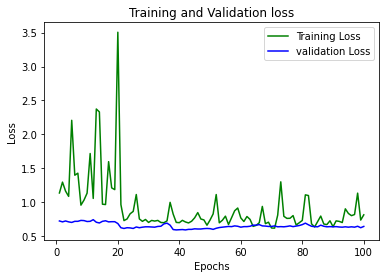

In [ ]:
# 딥러닝 평가지표 
# Trainig and Validation Loss 

loss_train = history5.history['loss']
loss_val = history5.history['accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)
                             
history5 = model5.fit(X_train3, 
                    validation_data=(Y_train3), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

ValueError: ignored

In [ ]:
print("%.7f" % (float(min(history.history['val_loss']))))
model5.load_weights(filename)
pred = model4.predict(test_data3)
actual = np.asarray(Y_test3)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))
print(pred.shape)
print(actual.shape)

In [ ]:
actual

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [ ]:
Y_test3

2022-02-07    1.0
2022-02-08    1.0
2022-02-09    1.0
2022-02-10    0.0
2022-02-11    0.0
2022-02-12    0.0
2022-02-13    0.0
2022-02-14    1.0
2022-02-15    1.0
2022-02-16    0.0
2022-02-17    0.0
2022-02-18    0.0
2022-02-19    1.0
2022-02-20    0.0
2022-02-21    0.0
2022-02-22    1.0
2022-02-23    0.0
2022-02-24    1.0
2022-02-25    1.0
2022-02-26    0.0
2022-02-27    0.0
2022-02-28    1.0
2022-03-01    1.0
2022-03-02    0.0
2022-03-03    0.0
2022-03-04    0.0
2022-03-05    1.0
2022-03-06    0.0
2022-03-07    0.0
2022-03-08    1.0
2022-03-09    1.0
2022-03-10    0.0
2022-03-11    0.0
2022-03-12    1.0
2022-03-13    0.0
2022-03-14    1.0
2022-03-15    0.0
2022-03-16    1.0
2022-03-17    0.0
2022-03-18    1.0
2022-03-19    1.0
2022-03-20    0.0
Name: close, dtype: float64

In [ ]:
pred3 = model5.predict(X_test3)
pred3

array([[1.0000000e+00],
       [9.9999368e-01],
       [6.0447937e-01],
       [1.0000000e+00],
       [6.0447937e-01],
       [6.0447937e-01],
       [6.0447937e-01],
       [9.9951947e-01],
       [6.0447937e-01],
       [6.0447937e-01],
       [7.0221070e-13],
       [1.0000000e+00],
       [6.0447937e-01],
       [4.3512472e-08],
       [9.9999976e-01],
       [6.0447937e-01],
       [6.0447937e-01],
       [1.0000000e+00],
       [6.0447937e-01],
       [6.0447937e-01],
       [7.6297283e-07],
       [1.0000000e+00],
       [6.0447937e-01],
       [6.0447937e-01],
       [6.0447937e-01],
       [6.1241770e-15],
       [6.0447937e-01],
       [2.4308488e-01],
       [9.9999154e-01],
       [6.0447937e-01],
       [6.0447937e-01],
       [1.3432831e-22],
       [6.0447937e-01],
       [6.0447937e-01],
       [8.4310523e-06],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [6.0447937e-01],
       [9.9982899e-01],
       [6.0447937e-01],
       [6.044793

In [ ]:
Y_test3

2022-02-07    1.0
2022-02-08    1.0
2022-02-09    1.0
2022-02-10    0.0
2022-02-11    0.0
2022-02-12    0.0
2022-02-13    0.0
2022-02-14    1.0
2022-02-15    1.0
2022-02-16    0.0
2022-02-17    0.0
2022-02-18    0.0
2022-02-19    1.0
2022-02-20    0.0
2022-02-21    0.0
2022-02-22    1.0
2022-02-23    0.0
2022-02-24    1.0
2022-02-25    1.0
2022-02-26    0.0
2022-02-27    0.0
2022-02-28    1.0
2022-03-01    1.0
2022-03-02    0.0
2022-03-03    0.0
2022-03-04    0.0
2022-03-05    1.0
2022-03-06    0.0
2022-03-07    0.0
2022-03-08    1.0
2022-03-09    1.0
2022-03-10    0.0
2022-03-11    0.0
2022-03-12    1.0
2022-03-13    0.0
2022-03-14    1.0
2022-03-15    0.0
2022-03-16    1.0
2022-03-17    0.0
2022-03-18    1.0
2022-03-19    1.0
2022-03-20    0.0
Name: close, dtype: float64

In [ ]:
pred3 = np.where(pred3>=0.5,1,0)
pred3

In [ ]:
pred = model5.predict(Y_test3)


ValueError: ignored

ValueError: ignored

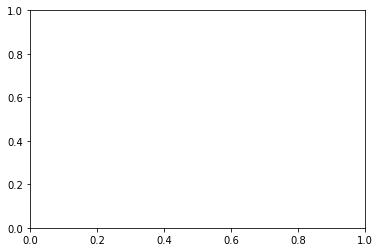

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,100)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['open', 'high', 'low', 'close', 'volume']
# 스케일 후 columns
scaled = scaler.fit_transform(btc_2[scale_cols])

btc_10 = pd.DataFrame(scaled, columns=scale_cols)
print(btc_10)

         open      high       low  close    volume
0    0.405311  0.510473  0.643761    1.0  0.425281
1    0.513660  0.575488  0.695646    1.0  0.377333
2    0.617759  0.605446  0.738437    1.0  0.396343
3    0.630804  0.559358  0.678880    0.0  0.418388
4    0.438366  0.454181  0.658512    1.0  0.323980
..        ...       ...       ...    ...       ...
408  0.458253  0.616525  0.675269    1.0  0.497649
409  0.609470  0.465762  0.724242    0.0  0.258294
410  0.471502  0.544829  0.618298    1.0  0.410470
411  0.541902  0.488648  0.708257    1.0  0.347285
412  0.514986  0.475628  0.659541    0.0  0.317405

[413 rows x 5 columns]


In [ ]:
# 레이블링 해서 시도하기? 
btc_2.loc[btc_2['close'] >= 0] = 1

,open,high,low,close,volume
2021-02-01,-1169.92,374.58,124.49,433.39,13975.996498
2021-02-02,424.12,1267.06,1121.84,1939.87,-4661.617002
2021-02-03,1955.62,1678.30,1944.38,2152.63,2727.673783
2021-02-04,2147.55,1045.64,799.57,-682.21,11296.402235
2021-02-05,-683.61,-398.15,408.05,1353.58,-25399.401623
...,...,...,...,...,...
2022-03-14,-1030.00,637.12,-23.51,1894.03,14153.630160
2022-03-15,1894.02,-59.51,543.33,-391.04,-929.904490
2022-03-16,-391.04,1830.39,730.15,1833.67,42105.212410
2022-03-17,1833.68,-239.18,1671.52,-196.10,-50931.380800


In [ ]:
btc1 = btc.drop('index', axis=1)
btc1

In [ ]:
# 2 Non-Stationary 
X_train, X_test, Y_train, Y_test = train_test_split(btc_1_.drop('close', 1), btc_1_['close'], test_size=0.1, random_state=0, shuffle=False)
X_train.shape, Y_train.shape
print(type(X_test))
print(X_test)

In [ ]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE=5
BATCH_SIZE=32

In [ ]:
Y_train

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(X_train, Y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(X_test, Y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=3,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 3]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)
                             
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=1000, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
      1/Unknown - 2s 2s/step - loss: 0.1800 - mse: 0.3602
Epoch 1: val_loss improved from inf to 0.09928, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 3s 50ms/step - loss: 0.1327 - mse: 0.2655 - val_loss: 0.0993 - val_mse: 0.1986
Epoch 2/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.1205 - mse: 0.2410
Epoch 2: val_loss improved from 0.09928 to 0.05562, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 0s 8ms/step - loss: 0.0840 - mse: 0.1681 - val_loss: 0.0556 - val_mse: 0.1112
Epoch 3/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.0569 - mse: 0.1139
Epoch 3: val_loss improved from 0.05562 to 0.02310, saving model to tmp/ckeckpointer.ckpt
12/12 [==============================] - 0s 7ms/step - loss: 0.0434 - mse: 0.0868 - val_loss: 0.0231 - val_mse: 0.0462
Epoch 4/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.0297 - mse: 0.0593
Epoch 4: val_loss improved from 

In [ ]:
print("%.7f" % (float(min(history.history['val_loss']))))
model.load_weights(filename)
pred = model.predict(test_data)
actual = np.asarray(Y_test)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))
print(pred.shape)
print(actual.shape)

0.0062074
(37, 1)
(37, 1)


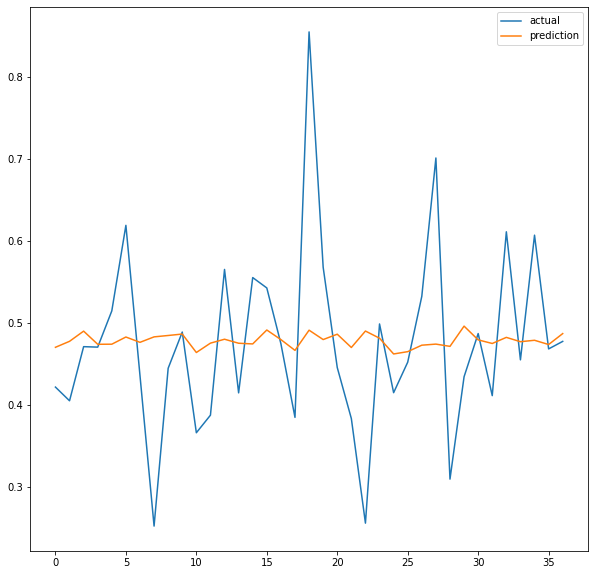

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model2 = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 5]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model2.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)
                             
history = model2.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=20, 
                    callbacks=[checkpoint, earlystopping])

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 5, 4)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)


In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
#filename = os.path.join('tmp', 'ckeckpointer.ckpt')
# checkpoint = ModelCheckpoint(filename, 
#                              save_weights_only=True, 
#                              save_best_only=True, 
#                              monitor='val_loss', 
#                              verbose=1)

In [ ]:
history = model2.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    )#callbacks=[checkpoint, earlystopping])

Epoch 1/50


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


ValueError: ignored

In [ ]:
pred = model2.predict(test_data)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


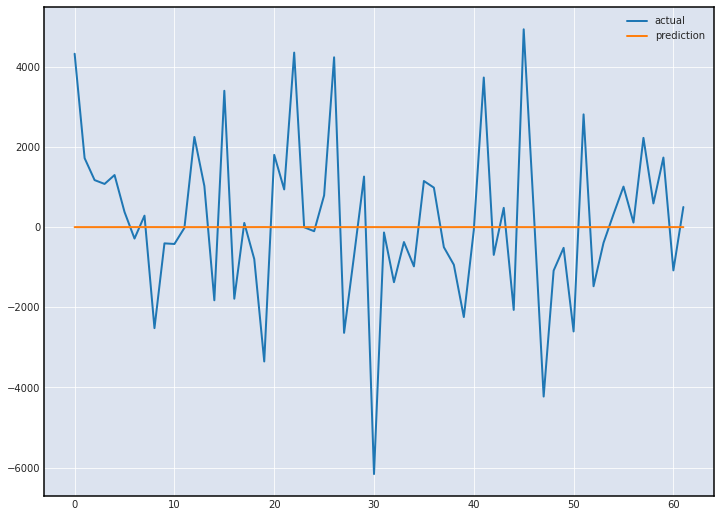

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(Y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
X_train.shape

(328, 4)

In [ ]:
#LSTM 모델 생성하기 

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               #input_shape=(100,1), 
               input_shape=(X_train.shape[1], X_train.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

IndexError: ignored

In [ ]:
# 모델의 학습 

# model.compile(loss='mean_squared_error', optimizer='adam')
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# #filename = os.path.join(model_path, 'tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# history = model.fit(X_train, Y_train, 
#                     epochs=10, 
#                     batch_size=16,
#                     validation_data=(X_test, Y_test), 
#                     callbacks=[early_stop, checkpoint])

model.compile(optimizer = 'adam',
              loss= 'mean_squared_error',
              metrics =['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10


ValueError: ignored

In [ ]:
# Dividing the Dataset 
feature = ['open', 'high', 'low', 'volume']
label = ['close']

X_train = train[feature]
Y_train = train[label]

# train dataset
#X_train, Y_train = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
X_train, _valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape
# ((6086, 20, 4), (1522, 20, 4))

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
# ((180, 20, 4), (180, 1))

Text(0.5, 1.0, 'test')

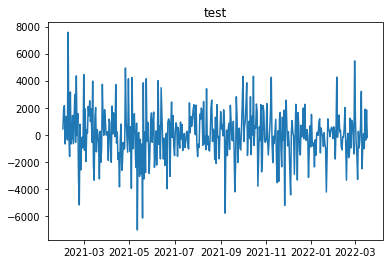

In [ ]:
# 비트코인 가격의 변화량은 Stationary 한가? 
# 작년 11월 ~ 올해 3월 까지의 변화량 

import matplotlib.pyplot as plt
plt.plot(btc_1['index'], btc_1['close'])
plt.title('test')

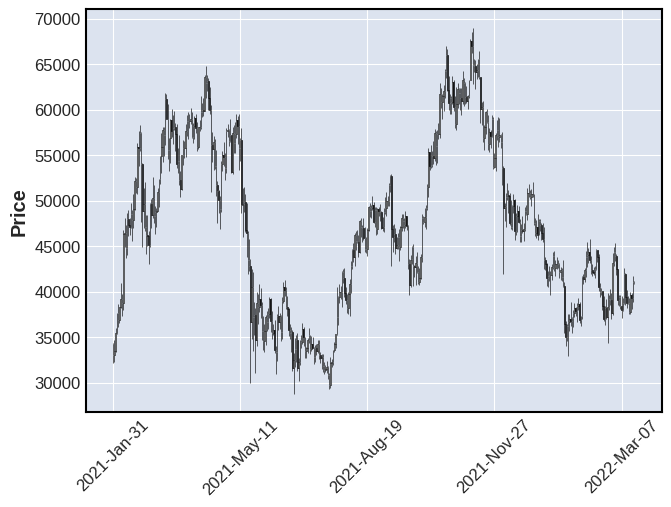

In [ ]:
# Plot BTC Data 
mpf.plot(btc_0, type='candle')

# 3번 시도 
코로나 빔 이후의 데이터를 사용 한다면? 
아직 제대로 보지는 않음 

Text(0.5, 1.0, 'test')

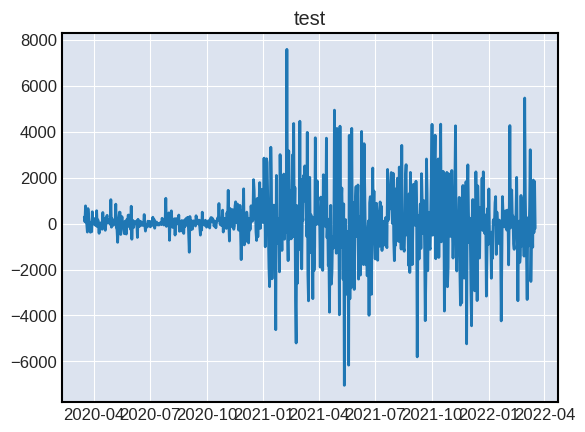

In [ ]:
# 실시간 비트코인 가격을 가져옵니다 

import requests
import pandas as pd

def get_crypto_price(symbol, exchange, start_date = None):
    api_key = 'YOUR API KEY'
    api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={api_key}'
    raw_df = requests.get(api_url).json()
    df = pd.DataFrame(raw_df['Time Series (Digital Currency Daily)']).T
    df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'close', '5. volume': 'volume'})
    for i in df.columns:
        df[i] = df[i].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
    if start_date:
        df = df[df.index >= start_date]
    return df

btc_01 = get_crypto_price(symbol = 'BTC', exchange = 'USD', start_date = '2020-03-16')

# 이 데이터를 CSV로 만든 다음에 캔들스틱으로 변환하고 그 후에 아래의 절차를 따른다? 

btc_02 = btc_01.diff()
btc_02= btc_02.dropna()
btc_02 = btc_02.reset_index()

# 비트코인 가격의 변화량은 Stationary 한가? 
# 2020년 3월(코로나빔 거의 직후) ~ 올해 3월 까지의 변화량 

import matplotlib.pyplot as plt
plt.plot(btc_02['index'], btc_02['close'])
plt.title('test')

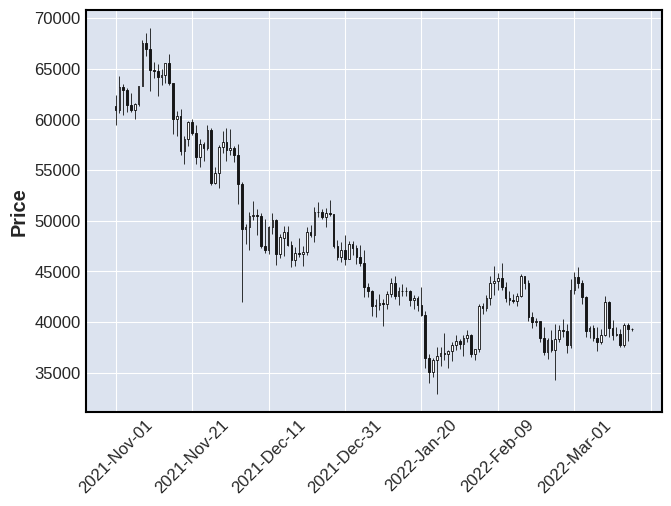

In [ ]:
# Plot BTC Data 
mpf.plot(btc, type='candle')

In [ ]:
import pandas_datareader as web

In [ ]:
# 캔들스틱 차트를 그리기 위해서 mpl_finance # 
!pip install mpl_finance

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from shutil import copyfile, move
from mpl_finance import candlestick2_ochl

ModuleNotFoundError: ignored

In [ ]:
def ohlc2cs(fname, seq_len, dimension):
    # python preprocess.py -m ohlc2cs -l 20 -i stockdatas/EWT_testing.csv -t testing
    print("Converting olhc to candlestick")
    symbol = fname.split('_')[0]
    print(symbol)
    df = pd.read_csv(fname, names=['Open','High','Low','Close','Volume','Change'])
    df.fillna(0)
    plt.style.use('dark_background')
    df.reset_index(inplace=True)

    figs = np.zeros((len(df)-1, dimension, dimension, 3))
    labels = []
    for i in range(0, len(df)-1):
        # ohlc+volume
        c = df.iloc[i:i + int(seq_len) - 1, :]
        c_ = df.iloc[i:i + int(seq_len), :]
        if len(c) == int(seq_len):
            my_dpi = 96
            # global fig
            fig = plt.figure(figsize=(dimension / my_dpi,
                                      dimension / my_dpi), dpi=my_dpi)
            ax1 = fig.add_subplot(1, 1, 1)
            candlestick2_ochl(ax1, c['Open'], c['Close'], c['High'],
                              c['Low'], width=1,
                              colorup='#77d879', colordown='#db3f3f')
            ax1.grid(False)
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.xaxis.set_visible(False)
            ax1.yaxis.set_visible(False)
            ax1.axis('off')

            # create the second axis for the volume bar-plot
            # Add a seconds axis for the volume overlay
          
        starting = c_["Close"].iloc[-2]
        endvalue = c_["Close"].iloc[-1]
        if endvalue > starting :
            label = 1
        else :
            label = 0
        labels.append(label)

        fig.canvas.draw()
        fig_np = np.array(fig.canvas.renderer._renderer)
        figs[i] = fig_np[:,:,:3]

        plt.close(fig)
        # normal length - end

    print("Converting olhc to candlestik finished.")
    return figs, labels

In [ ]:
pd.__version__ == '1.0.0'

False

In [ ]:
pip install pandas==0.25.1

     |████████████████████████████████| 10.4 MB 6.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.1 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 0.25.1 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.1 which is incompatible.


In [ ]:
inputs = 'btc1.csv'
inputs

'btc1.csv'

In [ ]:
# 비트코인 CSV 파일을 가져오기

inputs = 'btc1.csv'
seq_len = 20
dimension = 48

figures, labels = ohlc2cs(inputs, seq_len, dimension)

Converting olhc to candlestick
btc1.csv


NameError: ignored

In [ ]:
# 036570 : 엔씨소프트
# 비트코인 CSV 파일을 가져오기?? 

#inputs = '036570_from_2010.csv'
inputs = btc
seq_len = 20
dimension = 48

figures, labels = ohlc2cs(inputs, seq_len, dimension)

Converting olhc to candlestick
036570


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


Converting olhc to candlestik finished.


In [ ]:
#위 함수로 생성된 figures는 값의 범위가 0~255 이기 때문에 0~1로 맞춰주기 위해 255로 나눕니다.
figures = figures/255.0
print(np.shape(labels), np.shape(figures))

### 2. 데이터 Generator 생성

In [ ]:
def single_stock_generator(chart, labels, batch_size) :
    #output [chart, labels]
    while True :
        stock_batch = np.zeros(shape=(batch_size, dimension, dimension, 3))
        label_batch = np.zeros(shape=(batch_size, ))
        for i in range(batch_size) :
            idx = np.random.randint(len(labels))
            stock_batch[i] = chart[idx]
            label_batch[i] = labels[idx]

        yield stock_batch, label_batch


In [ ]:
train_len = 1500
batch_size = 16
train_gen = single_stock_generator(figures[:train_len], labels[:train_len], batch_size)
test_gen = single_stock_generator(figures[train_len:], labels[train_len:], batch_size)


NameError: ignored

In [ ]:
tmp_data = next(train_gen)
print("Chart image shape : ",np.shape(tmp_data[0]))
print("Label shape :",np.shape(tmp_data[1]))

Chart image shape :  (16, 48, 48, 3)
Label shape : (16,)


In [ ]:
# 만들어진 차트 이미지 중 하나를 예시로 그려보겠습니다.
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

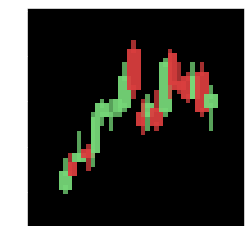

In [ ]:
plt.figure()
plt.imshow(tmp_data[0][0][:,:,:])
plt.show()

### 3. 모델 작성

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

In [ ]:
# Keras의 Functional APi를 이용할 거라서 불러와줍니다.
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 첫번째 시도할 구조는 논문에서 제시한 CNN 구조
# CNN의 filter size, dropout rate, padding 등은 언급이 안되어 있어서 임의로 넣음

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Conv2D(32, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(48, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Conv2D(64, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(96, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 24, 24, 48)        13872     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 12, 12, 48)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 12, 12, 48)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 12, 12, 64)        277

In [ ]:
num_iters = train_len // batch_size
num_epochs = 10

In [ ]:
def train_step(train_data_gen, test_data_gen, model) :
    optimizer = tf.keras.optimizers.Adam(0.0001)
    model = model
    loss_fn = tf.keras.losses.BinaryCrossentropy()
    num_test_iters = num_iters // 4
    for epoch in range(num_epochs) :
        epoch_loss_avg = tf.keras.metrics.Mean()
        val_loss_avg = tf.keras.metrics.Mean()

        for iter in range(num_iters) :
            x_batch, y_batch = next(train_data_gen)
            with tf.GradientTape() as tape :
                y_ = model(x_batch)
                loss_value = loss_fn(y_batch, y_)
                grads = tape.gradient(loss_value, model.trainable_variables)            
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            epoch_loss_avg(loss_value)
        
        for iter in range(num_test_iters) :
            x_batch, y_batch = next(test_data_gen)
            y_ = model(x_batch)
            loss_value = loss_fn(y_batch, y_)
            val_loss_avg(loss_value)
        

        
        print("Epoch {:03d}: , Train Loss: {:.5f}".format(epoch, epoch_loss_avg.result()))
        print("Val_Loss: {:.3f}".format(val_loss_avg.result()))


In [ ]:
train_step(train_gen, test_gen, model)

Epoch 000: , Train Loss: 0.69078
Val_Loss: 0.697
Epoch 001: , Train Loss: 0.69190
Val_Loss: 0.701
Epoch 002: , Train Loss: 0.69189
Val_Loss: 0.693
Epoch 003: , Train Loss: 0.69279
Val_Loss: 0.693
Epoch 004: , Train Loss: 0.69222
Val_Loss: 0.696
Epoch 005: , Train Loss: 0.69333
Val_Loss: 0.695
Epoch 006: , Train Loss: 0.69185
Val_Loss: 0.699
Epoch 007: , Train Loss: 0.69222
Val_Loss: 0.693
Epoch 008: , Train Loss: 0.69112
Val_Loss: 0.696
Epoch 009: , Train Loss: 0.69273
Val_Loss: 0.691


In [ ]:
y_

<tf.Tensor: id=5683842, shape=(2219, 1), dtype=float32, numpy=
array([[0.4786848 ],
       [0.47747847],
       [0.4801753 ],
       ...,
       [0.47713557],
       [0.47713557],
       [0.47713557]], dtype=float32)>

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Conv2D(32, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(48, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(96, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 24, 24, 48)        13872     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 12, 12, 48)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 12, 12, 64)        27712     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 6, 6, 64)          0  

In [ ]:
train_step(train_gen, test_gen, model)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: , Train Loss: 0.69291
Val_Loss: 0.692
Epoch 001: , Train Loss: 0.69183
Val_Loss: 0.698
Epoch 002: , Train Loss: 0.68997
Val_Loss: 0.710
Epoch 003: , Train Loss: 0.69299
Val_Loss: 0.699
Epoch 004: , Train Loss: 0.69032
Val_Loss: 0.692
Epoch 005: , Train Loss: 0.69190
Val_Loss: 0.693
Epoch 006: , Train Loss: 0.69220
Val_Loss: 0.696
Epoch 007: , Train Loss: 0.69304
Val_Loss: 0.693
Epoch 008: , Train Loss: 0.69274
Val_Loss: 0.696
Epoch 009: , Train Loss: 0.69194
Val_Loss: 0.691


In [ ]:
y_

<tf.Tensor: id=5683842, shape=(2219, 1), dtype=float32, numpy=
array([[0.4786848 ],
       [0.47747847],
       [0.4801753 ],
       ...,
       [0.47713557],
       [0.47713557],
       [0.47713557]], dtype=float32)>

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Conv2D(32, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(32, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(64, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 12, 12, 64)        0  

In [ ]:
train_step(train_gen, test_gen, model)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: , Train Loss: 0.69313
Val_Loss: 0.694
Epoch 001: , Train Loss: 0.68940
Val_Loss: 0.695
Epoch 002: , Train Loss: 0.69376
Val_Loss: 0.698
Epoch 003: , Train Loss: 0.69253
Val_Loss: 0.695
Epoch 004: , Train Loss: 0.69272
Val_Loss: 0.704
Epoch 005: , Train Loss: 0.69105
Val_Loss: 0.700
Epoch 006: , Train Loss: 0.69040
Val_Loss: 0.700
Epoch 007: , Train Loss: 0.69344
Val_Loss: 0.694
Epoch 008: , Train Loss: 0.69110
Val_Loss: 0.697
Epoch 009: , Train Loss: 0.69054
Val_Loss: 0.699
Epoch 010: , Train

In [ ]:
y_ = model(x_batch)
y_

<tf.Tensor: id=4077524, shape=(2219, 1), dtype=float32, numpy=
array([[0.47132692],
       [0.47132692],
       [0.47132692],
       ...,
       [0.4713269 ],
       [0.4713269 ],
       [0.4713269 ]], dtype=float32)>